- https://www.astroml.org/book_figures/chapter3/index.html
- https://www.datacamp.com/community/tutorials/probability-distributions-python

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as scs 

## Common Data Types

1. Discrete data
2. Continuous data 

## Relations between the Distributions

**Relation between Bernoulli and Binomial Distribution**
1. Bernoulli Distribution is a special case of Binomial Distribution with a single trial.
2. There are only two possible outcomes of a Bernoulli and Binomial distribution, namely success and failure.
3. Both Bernoulli and Binomial Distributions have independent trails.


**Relation between Poisson and Binomial Distribution**

Poisson Distribution is a limiting case of binomial distribution under the following conditions:

1. The number of trials is indefinitely large or n → ∞.
2. The probability of success for each trial is same and indefinitely small or p → 0.
3. np = λ, is finite.


**Relation between Normal and Binomial Distribution & Normal and Poisson Distribution**

Normal distribution is another limiting form of binomial distribution under the following conditions:

1. The number of trials is indefinitely large, n → ∞.
2. Both p and q are not indefinitely small.
3. The normal distribution is also a limiting case of Poisson distribution with the parameter λ →∞.


**Relation between Exponential and Poisson Distribution**

If the times between random events follow exponential distribution with rate λ, then the total number of events in a time period of length t follows the Poisson distribution with parameter λt.

## Type of Distributions
### Uniform Distribution 

\begin{align} 
  f(x) =
    \begin{cases}
      \frac{1}{b-a}   & \text{if $a \leq x \leq b$ }\\
      0 & \text{otherwise}
    \end{cases}  
\end{align}

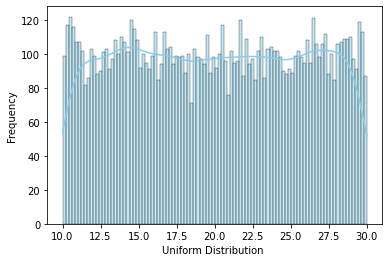

In [2]:
# Draw random samples from uniform distribution
n = 10000
start = 10
width = 20
data_uniform = scs.uniform.rvs(size=n, loc = start, scale=width)
ax = sns.histplot(data_uniform,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')
plt.show()

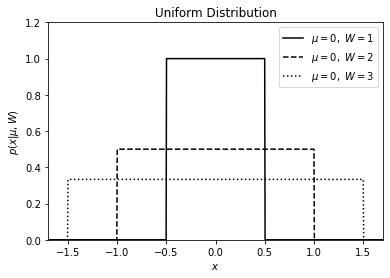

In [3]:
# Define the distribution parameters to be plotted
W_values = [1.0, 2.0, 3.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-2, 2, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(6, 4))

for W, ls in zip(W_values, linestyles):
    left = mu - 0.5 * W
    dist = scs.uniform(left, W)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ W=%i$' % (mu, W))

plt.xlim(-1.7, 1.7)
plt.ylim(0, 1.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu, W)$')
plt.title('Uniform Distribution')

plt.legend()
plt.show()

### Bernoulli Distribution

\begin{align} 
  f(x) =
    \begin{cases}
      p   & \text{if $x=1$ }\\
      1-p & \text{if $x=0$ }
    \end{cases}  
\end{align}

\begin{align}
E(x) &= p \\
V(x) &= p(1-p) \\
\end{align}

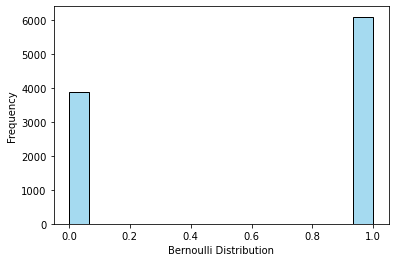

In [4]:
# Draw random samples from Bernoulli distribution 
data_bern = scs.bernoulli.rvs(size=10000,p=0.6)
ax= sns.histplot(data_bern,
                 kde=False,
                 color="skyblue")
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')
plt.show()

### Binomial Distribution

The properties of a Binomial Distribution are

- Each trial is independent.
- There are only two possible outcomes in a trial- either a success or a failure.
- A total number of n identical trials are conducted.
- The probability of success and failure is same for all trials. (Trials are identical.)

\begin{equation}
  f(x) = \frac{n!}{k!(n-k)!} p^{k}(1-p)^{n-k}
\end{equation}


\begin{align}
E(x) &= np \\
V(x) &= np(1-p) \\
\end{align}

In [5]:
k, n, p = 10, 100, 0.05
1- scs.binom.cdf(k, n, p) 

0.011472410067484784

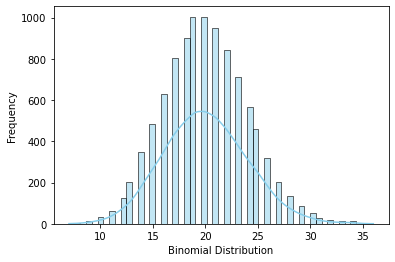

In [6]:
# Draw random samples from binomial distribution 
data_binom = scs.binom.rvs(n=100,p=0.2,size=10000)
ax = sns.histplot(data_binom,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')
plt.show()

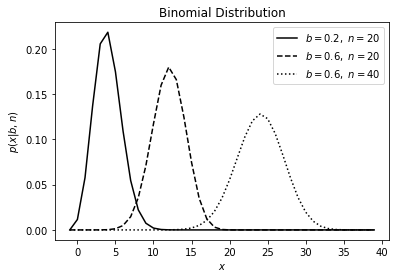

In [7]:
# Define the distribution parameters to be plotted
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 40)

# plot the distributions
fig, ax = plt.subplots(figsize=(6, 4))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = scs.binom(n, b)

    plt.plot(x, dist.pmf(x), color='black', linestyle=ls,
             label=r'$b=%.1f,\ n=%i$' % (b, n))

# plt.xlim(-0.5, 35)
# plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

### Normal Distribution

\begin{equation}
  f(x|\mu, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}} \exp{[-\frac{(x-\mu)^{2}}{2\sigma^{2}}]}
\end{equation}

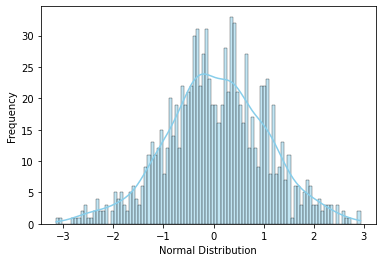

In [8]:
# Draw random samples from normal distribution 
data_normal = scs.norm.rvs(loc=0,scale=1,size=1000)
ax = sns.histplot(data_normal,
                  bins=100,
                  kde=True,
                  color='skyblue')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

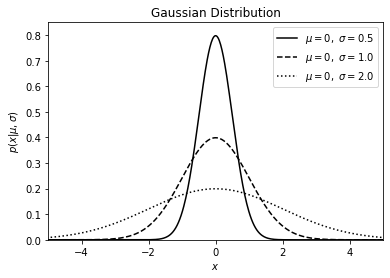

In [9]:
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(6, 4))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = scs.norm(mu, sigma)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()

### Poisson Distribution

\begin{equation}
  p(X=x) = \exp{(-\mu)} \frac{\mu^{x}}{x!} 
\end{equation}

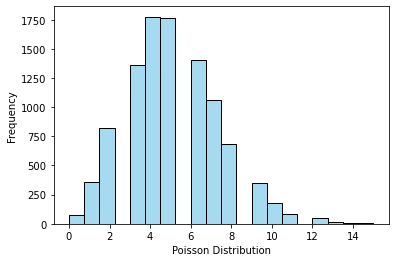

In [10]:
# Draw random samples from Poisson distribution 
data_poisson = scs.poisson.rvs(mu=5, size=10000)
ax = sns.histplot(data_poisson,
                  bins=20,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')
plt.show()

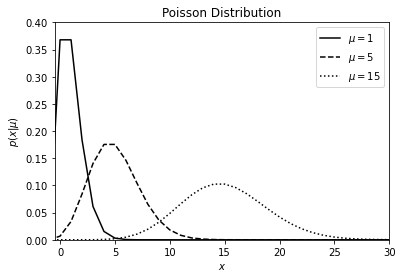

In [11]:
# Define the distribution parameters to be plotted
mu_values = [1, 5, 15]
linestyles = ['-', '--', ':']

# plot the distributions
#   we generate it using scipy.stats.poisson().  Once the distribution
#   object is created, we have many options: for example
#   - dist.pmf(x) evaluates the probability mass function in the case of
#     discrete distributions.
#   - dist.pdf(x) evaluates the probability density function for
#   evaluates
fig, ax = plt.subplots(figsize=(6, 4))

for mu, ls in zip(mu_values, linestyles):
    # create a poisson distribution
    # we could generate a random sample from this distribution using, e.g.
    #   rand = dist.rvs(1000)
    dist = scs.poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), color='black',
             linestyle=ls,
             label=r'$\mu=%i$' % mu)

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()

### Exponential Distribution

\begin{equation}
  f(x;\lambda) = \lambda \exp{(-\lambda x)}, \text{for $x\geq0$}
\end{equation}

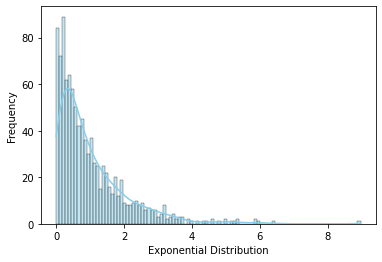

In [12]:
data_expon = scs.expon.rvs(scale=1,loc=0,size=1000)
ax = sns.histplot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue')
ax.set(xlabel='Exponential Distribution', ylabel='Frequency')
plt.show()

### Gamma Distribution

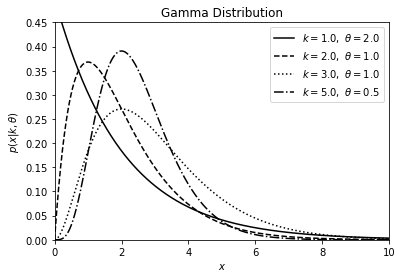

In [13]:
# plot the distributions
k_values = [1, 2, 3, 5]
theta_values = [2, 1, 1, 0.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(1E-6, 10, 1000)

# plot the distributions
fig, ax = plt.subplots(figsize=(6, 4))

for k, t, ls in zip(k_values, theta_values, linestyles):
    dist = scs.gamma(k, 0, t)
    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$k=%.1f,\ \theta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k,\theta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()

### Beta Distribution

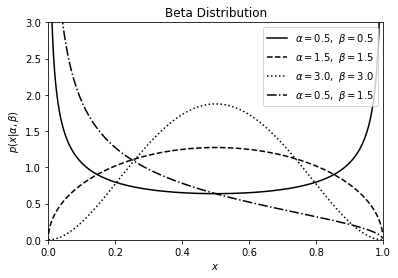

In [14]:
# Define the distribution parameters to be plotted
alpha_values = [0.5, 1.5, 3.0, 0.5]
beta_values = [0.5, 1.5, 3.0, 1.5]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

# plot the distributions
fig, ax = plt.subplots(figsize=(6, 4))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = scs.beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))

plt.xlim(0, 1)
plt.ylim(0, 3)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Beta Distribution')

plt.legend(loc=0)
plt.show()


### Example of Central Limit Theorem

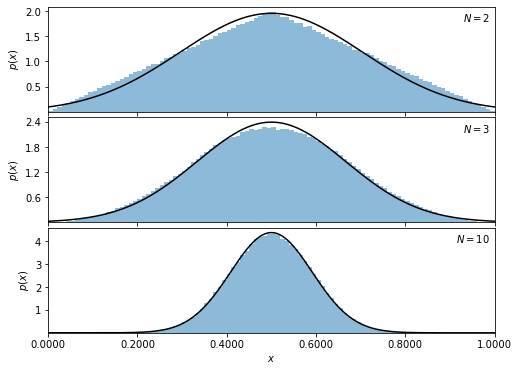

In [15]:
# Generate the uniform samples
N = [2, 3, 10]

np.random.seed(42)
x = np.random.random((max(N), int(1E6)))

# Plot the results
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    # take the mean of the first N[i] samples
    x_i = x[:N[i], :].mean(0)

    # histogram the data
    ax.hist(x_i, bins=np.linspace(0, 1, 101),
            histtype='stepfilled', alpha=0.5, density=True)

    # plot the expected gaussian pdf
    mu = 0.5
    sigma = 1. / np.sqrt(12 * N[i])
    dist = scs.norm(mu, sigma)
    x_pdf = np.linspace(-0.5, 1.5, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(0.2))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

# plt.title('Central Limit Theorem')
plt.show()

### Mean Convergence

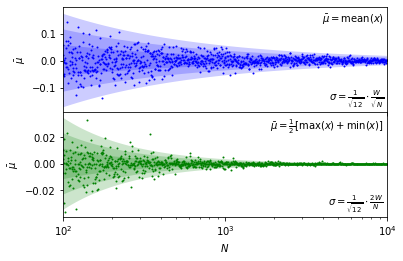

In [16]:
# Generate the random distribution
np.random.seed(0)

N = (10 ** np.linspace(2, 4, 1000)).astype(int)
mu = 0
W = 2
rng = scs.uniform(mu - 0.5 * W, W)  # uniform distribution between mu-W and mu+W

# Compute the cumulative mean and min/max estimator of the sample
mu_estimate_mean = np.zeros(N.shape)
mu_estimate_minmax = np.zeros(N.shape)

for i in range(len(N)):
    x = rng.rvs(N[i])  # generate N[i] uniformly distributed values
    mu_estimate_mean[i] = np.mean(x)
    mu_estimate_minmax[i] = 0.5 * (np.min(x) + np.max(x))

# compute the expected scalings of the estimator uncertainties
N_scaling = 2. * W / N / np.sqrt(12)
root_N_scaling = W / np.sqrt(N * 12)

# Plot the results
fig = plt.figure(figsize=(6, 4))
fig.subplots_adjust(hspace=0, bottom=0.15, left=0.15)

# upper plot: mean statistic
ax = fig.add_subplot(211, xscale='log')
ax.scatter(N, mu_estimate_mean, c='b', lw=0, s=4)

# draw shaded sigma contours
for nsig in (1, 2, 3):
    ax.fill(np.hstack((N, N[::-1])),
            np.hstack((nsig * root_N_scaling,
                       -nsig * root_N_scaling[::-1])), 'b', alpha=0.2)
ax.set_xlim(N[0], N[-1])
ax.set_ylim(-0.19, 0.199)
ax.set_ylabel(r'$\bar{\mu}$')
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.text(0.99, 0.95,
        r'$\bar\mu = \mathrm{mean}(x)$',
        ha='right', va='top', transform=ax.transAxes)
ax.text(0.99, 0.02,
        r'$\sigma = \frac{1}{\sqrt{12}}\cdot\frac{W}{\sqrt{N}}$',
        ha='right', va='bottom', transform=ax.transAxes)

# lower plot: min/max statistic
ax = fig.add_subplot(212, xscale='log')
ax.scatter(N, mu_estimate_minmax, c='g', lw=0, s=4)

# draw shaded sigma contours
for nsig in (1, 2, 3):
    ax.fill(np.hstack((N, N[::-1])),
            np.hstack((nsig * N_scaling,
                       -nsig * N_scaling[::-1])), 'g', alpha=0.2)
ax.set_xlim(N[0], N[-1])
ax.set_ylim(-0.0399, 0.039)
ax.set_xlabel('$N$')
ax.set_ylabel(r'$\bar{\mu}$')

ax.text(0.99, 0.95,
        r'$\bar\mu = \frac{1}{2}[\mathrm{max}(x) + \mathrm{min}(x)]$',
        ha='right', va='top', transform=ax.transAxes)
ax.text(0.99, 0.02,
        r'$\sigma = \frac{1}{\sqrt{12}}\cdot\frac{2W}{N}$',
        ha='right', va='bottom', transform=ax.transAxes)

plt.show()

### Correlation Estimates

In [17]:
def bivariate_normal(mu=[0, 0], sigma_1=1, sigma_2=1, alpha=0,
                     size=None, return_cov=False):
    """Sample points from a 2D normal distribution"""
    # compute covariance matrix
    sigma_xx = ((sigma_1 * np.cos(alpha)) ** 2
                + (sigma_2 * np.sin(alpha)) ** 2)
    sigma_yy = ((sigma_1 * np.sin(alpha)) ** 2
                + (sigma_2 * np.cos(alpha)) ** 2)
    sigma_xy = (sigma_1 ** 2 - sigma_2 ** 2) * np.sin(alpha) * np.cos(alpha)

    cov = np.array([[sigma_xx, sigma_xy],
                    [sigma_xy, sigma_yy]])

    # draw points from the distribution
    x = np.random.multivariate_normal(mu, cov, size)

    if return_cov:
        return x, cov
    else:
        return x

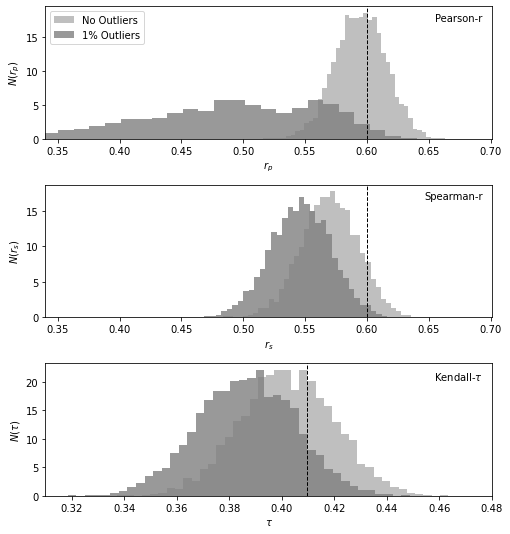

In [18]:
# Set parameters for the distributions
Nbootstraps = 5000
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01

# sample the distribution
# without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5,
                                      45 * np.pi / 180., int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
# @pickle_results('fig_correlations_dump.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([scs.pearsonr,
                                           scs.spearmanr,
                                           scs.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

# Plot the results in a three-panel plot
pct = '%'
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.35)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100), pct)))

distributions = ['Pearson-r', 'Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_p', 'r_s', r'\tau']\

for i in range(3):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',
                density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i < 2:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.701)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.31, 0.48)
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes)

    ax.set_xlabel('$%s$' % xlabels[i])
    ax.set_ylabel('$N(%s)$' % xlabels[i])

plt.show()

### Random Values from an Empirical Distribution

In [19]:
from scipy import stats, interpolate

class EmpiricalDistribution:
    """
    Empirically learn a distribution from one-dimensional data.
    This function works by approximating the inverse of the cumulative
    distribution using an efficient spline fit to the sorted values.
    """
    def __init__(self, data):
        # copy, because we'll need to sort in-place
        data = np.array(data, copy=True)
        if data.ndim != 1:
            raise ValueError("data should be one-dimensional")
        data.sort()

        # set up spline
        y = np.linspace(0, 1, data.size)
        self._tck = interpolate.splrep(y, data)

    def rvs(self, shape):
        """Draw random variables from the distribution
        Parameters
        ----------
        shape : integer or tuple
            shape of desired array
        Returns
        -------
        rv : ndarray, shape=shape
            random variables
        """
        # generate uniform variables between 0 and 1
        y = np.random.random(shape)
        return interpolate.splev(y, self._tck)

In [20]:
def hist(a, bins=10, range=None, **kwargs):
    """Enhanced histogram
    This is a histogram function that enables the use of more sophisticated
    algorithms for determining bins.  Aside from the `bins` argument allowing
    a string specified how bins are computed, the parameters are the same
    as numpy.histogram().
    """
    a = np.asarray(a)

    # if range is specified, we need to truncate the data for
    # the bin-finding routines
    if (range is not None and (bins in ['blocks', 'knuth',
                                        'scotts', 'freedman'])):
        a = a[(a >= range[0]) & (a <= range[1])]

    if isinstance(bins, str):
        if bins == 'blocks':
            bins = astropy_stats.bayesian_blocks(a)
        elif bins == 'knuth':
            da, bins = astropy_stats.knuth_bin_width(a, True)
        elif bins == 'scotts':
            da, bins = astropy_stats.scott_bin_width(a, True)
        elif bins == 'freedman':
            da, bins = astropy_stats.freedman_bin_width(a, True)
        else:
            raise ValueError("unrecognized bin code: '{}'".format(bins))

    return np.histogram(a, bins, range, **kwargs)

<ipython-input-21-90aa3f82542a>:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  x = np.hstack((d.rvs(int(f * Ndata)) for d, f in zip(dists, fracs)))


KS test: D = 0.0028; p = 1


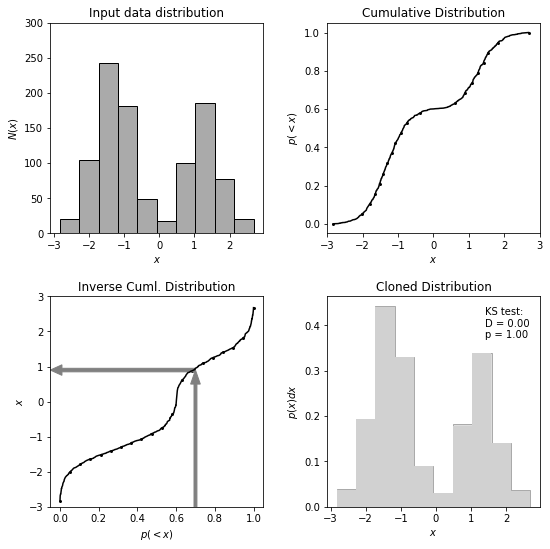

In [21]:
# Create a distribution and clone it
Ndata = 1000
Nclone = 100000
np.random.seed(0)

# generate an 'observed' bimodal distribution with 10000 values
dists = (stats.norm(-1.3, 0.5), stats.norm(1.3, 0.5))
fracs = (0.6, 0.4)
x = np.hstack((d.rvs(int(f * Ndata)) for d, f in zip(dists, fracs)))

# We can clone the distribution easily with this function
x_cloned = EmpiricalDistribution(x).rvs(Nclone)

# compute the KS test to check if they're the same
D, p = stats.ks_2samp(x, x_cloned)
print("KS test: D = %.2g; p = %.2g" % (D, p))

#------------------------------------------------------------
# For the sake of this example, we need to calculate some
#  of the partial steps used by EmpiricalDistribution

# create a cumulative distribution
x.sort()
Px_cuml = np.linspace(0, 1, Ndata)

# set up an interpolation of the inverse cumulative distribution
tck = interpolate.splrep(Px_cuml, x)

# sample evenly along the cumulative distribution, and interpolate
Px_cuml_sample = np.linspace(0, 1, 10 * Ndata)
x_sample = interpolate.splev(Px_cuml_sample, tck)

#------------------------------------------------------------
# Plot the cloned distribution and the procedure for obtaining it
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(hspace=0.3, left=0.1, right=0.95,
                    bottom=0.08, top=0.92, wspace=0.3)

indices = np.linspace(0, Ndata - 1, 20).astype(int)

# plot a histogram of the input
ax = fig.add_subplot(221)
# hist(x, bins='knuth', ax=ax,
#      histtype='stepfilled', ec='k', fc='#AAAAAA')
plt.hist(x, ec='k', fc='#AAAAAA')
ax.set_ylim(0, 300)
ax.set_title('Input data distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$N(x)$')

# plot the cumulative distribution
ax = fig.add_subplot(222)
ax.scatter(x[indices], Px_cuml[indices], lw=0, c='k', s=9)
ax.plot(x, Px_cuml, '-k')
ax.set_xlim(-3, 3)
ax.set_ylim(-0.05, 1.05)
ax.set_title('Cumulative Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(<x)$')

# plot the inverse cumulative distribution and spline fit
ax = fig.add_subplot(223)
ax.scatter(Px_cuml[indices], x[indices], lw=0, c='k', s=9)
ax.plot(Px_cuml_sample, x_sample, '-k')
ax.arrow(0.7, -3, 0, 3.5, width=0.015, fc='gray', ec='gray',
         head_width=0.05, head_length=0.4)
ax.arrow(0.7, 0.9, -0.69, 0, width=0.1, fc='gray', ec='gray',
         head_width=0.3, head_length=0.06)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-3, 3)
ax.set_title('Inverse Cuml. Distribution')
ax.set_xlabel('$p(<x)$')
ax.set_ylabel('$x$')

# plot the resulting cloned distribution
ax = fig.add_subplot(224)
plt.hist(x, density=True,
     ec='#AAAAAA', fc='#DDDDDD',
     label='input data')
plt.hist(x_cloned, density=True,
     color='#d1d1d1', label='cloned data')
ax.set_title('Cloned Distribution')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)dx$')
ax.text(0.74, 0.95, "KS test:\nD = %.2f\np = %.2f" % (D, p),
        ha='left', va='top', transform=ax.transAxes)

plt.show()